In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#from pathlib import Path
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = Path("C:/Users/Jade Richardson/Desktop/Food_Data")
#path=untar_data(URLs.MNIST_SAMPLE); path

In [5]:
(path/'train').ls()

[WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hamburger'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hotdog'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/pizza'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/spaghetti')]

In [6]:
path_img = path/'train/hamburger'

In [7]:
fnames= get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hamburger/2Q__ (1).jpg'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hamburger/2Q__ (2).jpg'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hamburger/2Q__ (3).jpg'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hamburger/2Q__ (4).jpg'),
 WindowsPath('C:/Users/Jade Richardson/Desktop/Food_Data/train/hamburger/2Q__ (5).jpg')]

In [8]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=64)
doc(data.show_batch)

In [9]:
#data.show_batch(rows=3,figsize=(5,5))

In [10]:
len(data.classes)

4

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.711864,0.412357,0.145000,00:37
1,0.921391,0.149937,0.037500,00:34
2,0.605085,0.106768,0.042500,00:35
3,0.443819,0.083372,0.037500,00:34
4,0.328233,0.066098,0.027500,00:34
5,0.258390,0.055876,0.017500,00:35
6,0.210054,0.055533,0.020000,00:34
7,0.178334,0.053953,0.020000,00:35


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [20]:

doc(interp.top_losses)


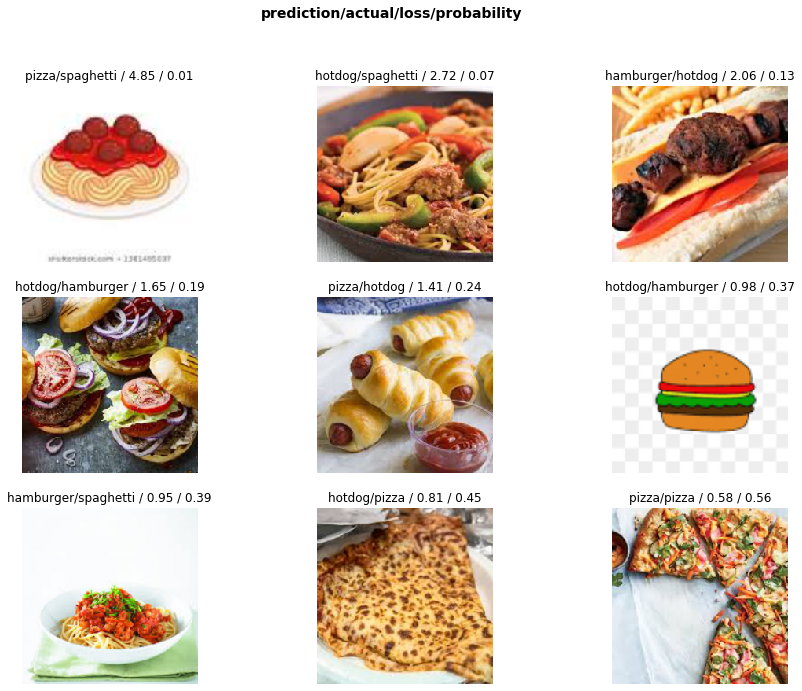

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

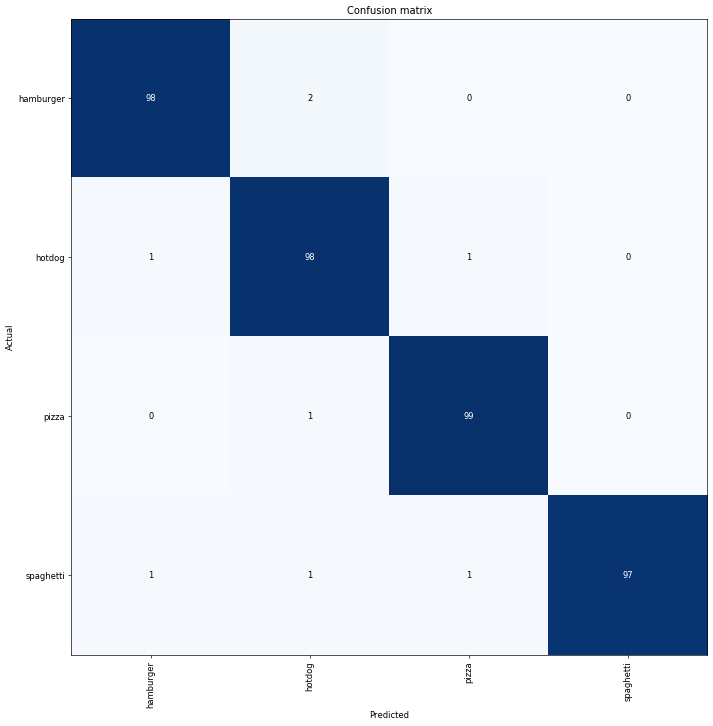

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('hamburger', 'hotdog', 2)]

In [21]:
learn.save('stage-1')

In [22]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1) #Train the entire cnn model

epoch,train_loss,valid_loss,error_rate,time
0,0.176434,0.419155,0.102500,00:38


In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hamburger,hamburger,hamburger,hamburger,hamburger
Path: C:\Users\Jade Richardson\Desktop\Food_Data;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hamburger,hamburger,hamburger,hamburger,hamburger
Path: C:\Users\Jade Richardson\Desktop\Food_Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


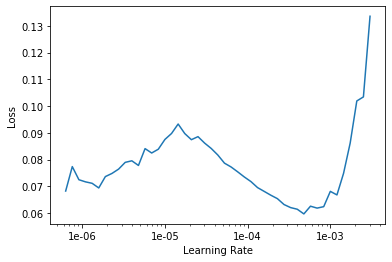

In [28]:
learn.recorder.plot()

In [29]:
doc(learn.recorder.plot)

In [32]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(6e-4,7.5e-4)) #choose range of smallest learning rate

epoch,train_loss,valid_loss,error_rate,time
0,0.149007,0.278551,0.065000,00:36
1,0.144578,0.578232,0.107500,00:35
2,0.202757,2.418454,0.285000,00:36
3,0.235148,2.147921,0.205000,00:36
4,0.207965,0.159178,0.040000,00:35
5,0.187247,0.375334,0.090000,00:35
6,0.154040,0.190856,0.065000,00:35
7,0.128797,0.110902,0.037500,00:36


In [35]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=bs//2).normalize(imagenet_stats)

In [36]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


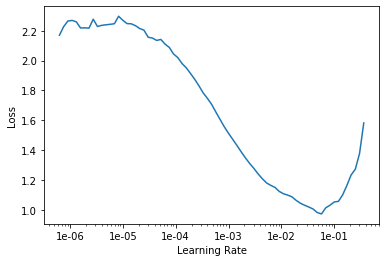

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.633457,0.040627,0.022500,00:38
1,0.367941,0.082952,0.032500,00:37
2,0.291975,0.104129,0.035000,00:37
3,0.250319,0.092553,0.027500,00:37
4,0.194781,0.088578,0.025000,00:37
5,0.146057,0.060711,0.017500,00:38
6,0.114525,0.056400,0.012500,00:39
7,0.092857,0.058541,0.012500,00:37


In [40]:
learn.save('stage-1-50')

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

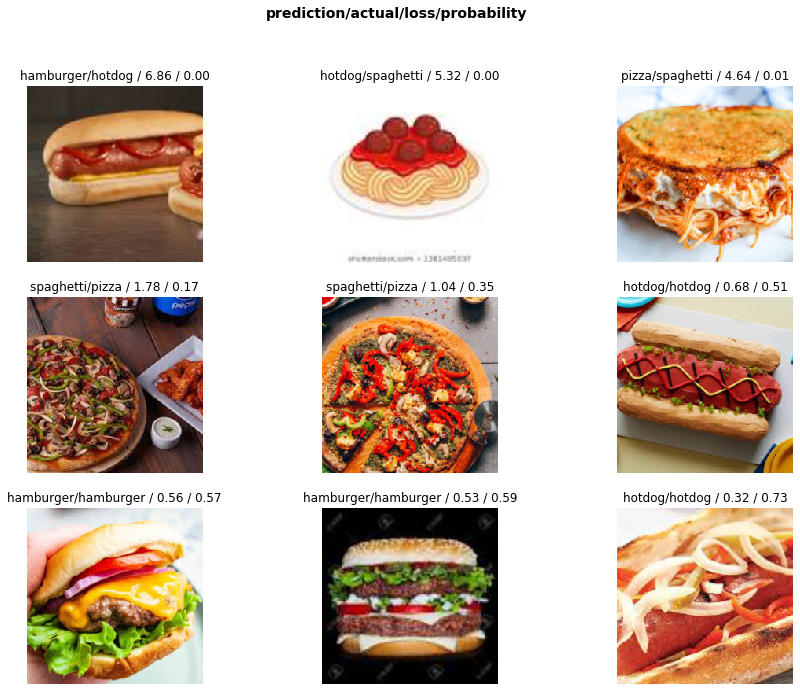

In [42]:
interp.plot_top_losses(9, figsize=(15,11))

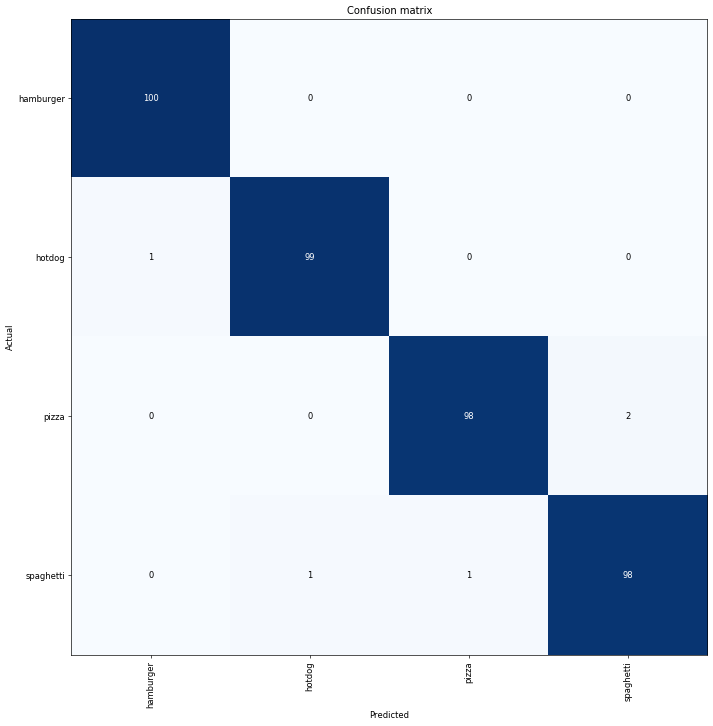

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [44]:
interp.most_confused(min_val=2)

[('pizza', 'spaghetti', 2)]

In [45]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(5e-2,9e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.710549,4153064.750000,0.750000,00:41
1,3.517622,5.634811,0.772500,00:39
2,3.475487,2.933611,0.760000,00:40
3,3.119885,1.417495,0.670000,00:40


In [46]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hamburger,hamburger,hamburger,hamburger,hamburger
Path: C:\Users\Jade Richardson\Desktop\Food_Data;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hamburger,hamburger,hamburger,hamburger,hamburger
Path: C:\Users\Jade Richardson\Desktop\Food_Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=